Enter the value of k for KNN: 9


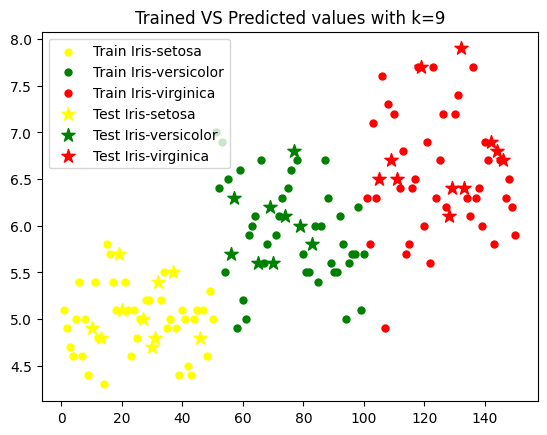

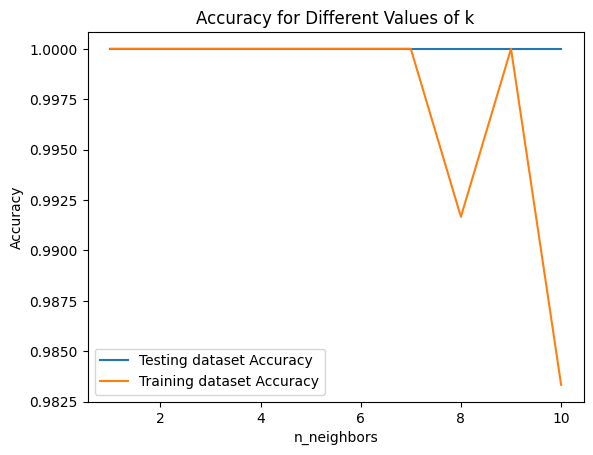

In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
data=pd.read_csv('iris.csv')
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

k = int(input("Enter the value of k for KNN: ")) 
knn = KNeighborsClassifier(n_neighbors=k)  
knn.fit(x_train, y_train.ravel())  
# Predict on dataset which model has not seen before 
y_pred=knn.predict(x_test)

class_colors = {'Iris-setosa': 'yellow', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}
for class_label in np.unique(y_train):
    plt.scatter(x_train[y_train.flatten() == class_label, 0], x_train[y_train.flatten() == class_label, 1],
                marker='.', s=100, label=f'Train {class_label}', color=class_colors[class_label])

# Create scatter plots for test set
for class_label in np.unique(y_pred):
    plt.scatter(x_test[y_pred == class_label, 0], x_test[y_pred == class_label, 1],
        marker='*', s=100, label=f'Test {class_label}', color=class_colors[class_label])

plt.title(f"Trained VS Predicted values with k={k}")
plt.legend()
plt.show()

neighbors = np.arange(1, 11) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train.ravel()) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(x_train, y_train) 
    test_accuracy[i] = knn.score(x_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.title('Accuracy for Different Values of k')
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show() 